In [1]:
from models.autoencoder import AutoEncoder
from models.nnmodel import NNModel
from models.rfmodel import RFModel
from data_processor.data_processing import DataProcessing
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from data_processor.base_bars import BaseBars

Using TensorFlow backend.


In [2]:
import time

In [3]:
start = time.time()

In [4]:
features = pd.read_csv('/Users/andyliu/develop/andy/data_processing/spy_indicators.csv')

In [5]:
features.head()

,Unnamed: 0,Date,open,high,low,close,Adj Close,Volume,bb_bbm,bb_bbh,...,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,25,2015-09-28,191.779999,191.910004,187.639999,188.009995,171.096954,178515900,195.2680,200.883601,...,4.172916,-1.178742,-192.854078,194.285195,-4.003069,195.358334,192.254001,2.426203,-3.806601,-4.003069
1,26,2015-09-29,188.270004,189.740005,186.929993,188.119995,171.197083,159045600,194.7905,201.090328,...,4.075566,-1.561348,-182.945293,193.463168,-4.381422,194.640000,191.095999,7.456150,-4.245145,-4.381422
2,27,2015-09-30,190.369995,191.830002,189.440002,191.630005,174.391342,163452000,194.7835,201.097033,...,4.049454,-1.563317,-102.935516,193.218746,-2.234575,194.275000,190.701999,29.448686,-1.175803,-2.234575
3,28,2015-10-01,192.080002,192.490005,189.820007,192.130005,174.846375,131079000,194.6195,201.029088,...,3.950922,-1.507157,-80.082798,193.073581,-3.189561,193.747500,190.548001,32.581517,-0.759298,-3.189561
4,29,2015-10-02,189.770004,195.029999,189.119995,195.000000,177.458160,211003300,194.5920,200.990092,...,4.090856,-1.217037,-36.705309,193.330437,-2.587668,193.315834,190.978000,50.563935,1.088650,-2.587668


In [6]:
features = features.drop('Unnamed: 0', axis=1)
features = features.drop('Date', axis=1)
features = features.drop('Volume', axis=1)

In [7]:
features = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]

In [8]:
features.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'bb_bbm', 'bb_bbh',
       'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [9]:
n = features.shape[0]
n_train = 4*n//5

In [10]:
#features = features.drop('volume', axis=1)
#features = features.drop('Unnamed: 0', axis=1)
y = features['close']
x = features.drop('close', axis=1)

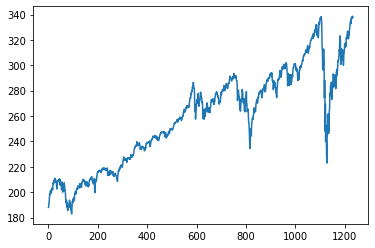

In [11]:
plt.plot(y)

In [12]:
x.shape

(1234, 17)

In [13]:
train = x.iloc[:n_train,:]
test = x.iloc[n_train:,:]

In [14]:
test.shape

(247, 17)

In [15]:
a_train_y = y[:n_train]
train_y = a_train_y
a_test_y = y[n_train:]
test_y = a_test_y

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_y = scaler.fit_transform(np.array(test_y).reshape(-1,1))
train_y = scaler.transform(np.array(train_y).reshape(-1,1))

In [17]:
a_train_x = train
a_test_x = test

In [18]:
a_train_x

,open,high,low,Adj Close,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,191.779999,191.910004,187.639999,171.096954,195.268000,200.883601,189.652399,4.172916,-1.178742,-192.854078,194.285195,-4.003069,195.358334,192.254001,2.426203,-3.806601,-4.003069
1,188.270004,189.740005,186.929993,171.197083,194.790500,201.090328,188.490672,4.075566,-1.561348,-182.945293,193.463168,-4.381422,194.640000,191.095999,7.456150,-4.245145,-4.381422
2,190.369995,191.830002,189.440002,174.391342,194.783500,201.097033,188.469967,4.049454,-1.563317,-102.935516,193.218746,-2.234575,194.275000,190.701999,29.448686,-1.175803,-2.234575
3,192.080002,192.490005,189.820007,174.846375,194.619500,201.029088,188.209912,3.950922,-1.507157,-80.082798,193.073581,-3.189561,193.747500,190.548001,32.581517,-0.759298,-3.189561
4,189.770004,195.029999,189.119995,177.458160,194.592000,200.990092,188.193908,4.090856,-1.217037,-36.705309,193.330437,-2.587668,193.315834,190.978000,50.563935,1.088650,-2.587668
5,196.460007,198.740005,196.330002,180.616028,194.886000,201.427867,188.344134,4.065795,-0.699056,75.474609,194.015712,-0.630849,193.210835,193.070001,72.305787,2.914179,-0.630849
6,198.309998,198.979996,197.000000,179.997192,194.904000,201.475680,188.332320,3.916810,-0.339510,74.435410,194.518949,1.197235,193.405834,195.004001,68.045087,5.201850,1.197235
7,198.899994,199.830002,197.479996,181.471436,195.135001,201.992970,188.277031,3.804895,0.075287,90.876922,195.171090,1.501576,193.651667,196.560001,96.744204,6.001493,1.501576
8,198.949997,201.550003,198.589996,183.109528,195.403001,202.753058,188.052943,3.744546,0.543002,112.877033,195.976279,3.764635,194.260001,198.376001,97.674448,4.999218,3.764635
9,201.380005,201.899994,200.580002,183.218719,195.632501,203.409455,187.855547,3.571364,0.912830,116.050816,196.690109,3.992766,194.904167,199.642001,96.192438,4.788423,3.992766


In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_a = scaler.fit_transform(a_train_x)
x_test_a = scaler.transform(a_test_x)

In [20]:
x_train_a.shape

(987, 17)

In [21]:
autoencoder = AutoEncoder(10, x_train_a.shape[1])
autoencoder.build_model()

In [22]:
print('Training model...')
autoencoder.train_model(autoencoder.autoencoder, x_train_a, epochs=30, model_name='autoencoder')

Training model...
Epoch 1/30
987/987 [==============================] - 0s 173us/step - loss: 0.2265 - acc: 0.0365 - mae: 0.3955
Epoch 2/30
987/987 [==============================] - 0s 41us/step - loss: 0.1990 - acc: 0.1185 - mae: 0.3575
Epoch 3/30
987/987 [==============================] - 0s 41us/step - loss: 0.1807 - acc: 0.1966 - mae: 0.3316
Epoch 4/30
987/987 [==============================] - 0s 41us/step - loss: 0.1641 - acc: 0.2320 - mae: 0.3065
Epoch 5/30
987/987 [==============================] - 0s 41us/step - loss: 0.1563 - acc: 0.2584 - mae: 0.2902
Epoch 6/30
987/987 [==============================] - 0s 40us/step - loss: 0.1499 - acc: 0.2725 - mae: 0.2786
Epoch 7/30
987/987 [==============================] - 0s 40us/step - loss: 0.1430 - acc: 0.2857 - mae: 0.2664
Epoch 8/30
987/987 [==============================] - 0s 42us/step - loss: 0.1361 - acc: 0.4043 - mae: 0.2557
Epoch 9/30
987/987 [==============================] - 0s 39us/step - loss: 0.1315 - acc: 0.5350 - mae

In [23]:
print('Testing model...')
autoencoder.test_model(autoencoder.autoencoder, x_test_a)

Testing model...
247/247 [==============================] - 0s 155us/step
[0.2281753331543463, 0.19028340280056, 0.2243511974811554]


In [24]:
a_scaled_full = pd.DataFrame(scaler.transform(x))

In [25]:
a_scaled_full.shape

(1234, 17)

In [26]:
autoencoder.encode_data(a_scaled_full, csv_path='./full_x.csv')

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.517326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.482567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.352087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.310649,0.000000,0.000000,0.000000,0.030684,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.199911,0.131580,0.000000,0.000000,0.181326,0.074239,0.000000,0.000000,0.000000
5,0.000000,0.012376,0.291993,0.000000,0.296407,0.368005,0.409982,0.000000,0.000000,0.000000
6,0.000000,0.112327,0.353586,0.000000,0.343815,0.273310,0.624376,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.604961,0.000000,0.713598,0.475186,0.680506,0.000000,0.000000,0.000000
8,0.000000,0.014429,0.464087,0.000000,0.904388,0.425533,0.828641,0.000000,0.000000,0.000000
9,0.000000,0.047449,0.445334,0.000000,0.931548,0.381143,0.856264,0.000000,0.000000,0.000000


In [27]:
df1 = pd.read_csv("./full_x.csv", index_col=0)
df2 = pd.DataFrame(y)

In [28]:
(df1.shape, df2.shape)

((1234, 10), (1234, 1))

In [29]:
train_x = df1.iloc[:n_train,:]
test_x = df1.iloc[n_train:, :]

In [30]:
'''fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, 
csv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)
y = pd.read_csv('sample_data/processed_data/rf_data/full_y.csv', index_col=0)
preprocess.check_labels(y)'''

'fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, \ncsv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)\ny = pd.read_csv(\'sample_data/processed_data/rf_data/full_y.csv\', index_col=0)\npreprocess.check_labels(y)'

In [31]:
'''train_x = pd.read_csv('sample_data/processed_data/rf_data/train_x.csv', index_col=0)
train_y = pd.read_csv('sample_data/processed_data/rf_data/train_y.csv', index_col=0)
test_x = pd.read_csv('sample_data/processed_data/rf_data/test_x.csv', index_col=0)
test_y = pd.read_csv('sample_data/processed_data/rf_data/test_y.csv', index_col=0)'''
train_x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.517326,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.482567,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.352087,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.310649,0.00000,0.0,0.0,0.030684,0.000000,0.0,0.0,0.0
4,0.0,0.199911,0.13158,0.0,0.0,0.181326,0.074239,0.0,0.0,0.0


In [32]:
#val_x = test_x.iloc[:n_val,:]
#test_x = test_x.iloc[n_val:,:]

In [33]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)
#x_val = scaler.transform(val_x)

In [34]:
#pd.DataFrame(x_val).max(axis=0)

In [35]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.0,-0.053467,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0
1,-1.0,-0.117065,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0
2,-1.0,-0.355799,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0
3,-1.0,-0.431616,-1.000000,-1.0,-1.0,-0.922564,-1.000000,-1.0,-1.0,-1.0
4,-1.0,-0.634230,-0.696867,-1.0,-1.0,-0.542392,-0.894191,-1.0,-1.0,-1.0


In [36]:
#nnmodel = NNModel(x_train.shape[1])
#nnmodel.make_model()

#print('Training model...')
#nnmodel.train_model(x_train, train_y, model_name='nnmodel', epochs=1000)

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [38]:
len(x_train)

987

In [39]:
X_train= np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
X_test=np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))
#X_val=np.reshape(x_val, (len(x_val), 1, x_val.shape[1]))

In [40]:
#val_y = test_y[:n_val]
#test_y = test_y[n_val:]

In [41]:
X_test.shape

(247, 1, 10)

In [42]:
from keras.models import load_model
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [43]:
#model = load_model('./models/attempt1.h5')

In [44]:
neurons=60
dropout=0.20
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons*2, return_sequences=True, activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='relu'))
model.add(Dense(units=1))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 60)             17040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [45]:
#scaler = MinMaxScaler(feature_range=(0, 1))

In [46]:
print(train_y.shape, test_y.shape)
print(X_train.shape, X_test.shape)
#train_y = np.array(scaler.fit_transform(np.array(train_y).reshape(-1,1)))
#test_y = np.array(scaler.fit_transform(np.array(test_y).reshape(-1,1)))

(987, 1) (247, 1)
(987, 1, 10) (247, 1, 10)


In [47]:
np.array(train_y)

array([[-0.30201397],
       [-0.30106316],
       [-0.27072337],
       [-0.26640148],
       [-0.24159385],
       [-0.2115999 ],
       [-0.21747774],
       [-0.20347471],
       [-0.18791587],
       [-0.18687866],
       [-0.18523632],
       [-0.19621396],
       [-0.20451206],
       [-0.17806196],
       [-0.17010969],
       [-0.16924539],
       [-0.17149272],
       [-0.18238385],
       [-0.15290863],
       [-0.13346011],
       [-0.13786839],
       [-0.14132586],
       [-0.12101303],
       [-0.12205024],
       [-0.12982973],
       [-0.10856596],
       [-0.10329324],
       [-0.10882526],
       [-0.11064051],
       [-0.11159134],
       [-0.12853309],
       [-0.1243841 ],
       [-0.13147195],
       [-0.15653901],
       [-0.17641975],
       [-0.14979686],
       [-0.15109338],
       [-0.12291468],
       [-0.1244705 ],
       [-0.11790126],
       [-0.11997569],
       [-0.11755544],
       [-0.11781475],
       [-0.11574031],
       [-0.12326037],
       [-0

In [48]:
#es=EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

Epoch 1/4000
987/987 [==============================] - 0s 270us/step - loss: 0.0076
Epoch 2/4000
987/987 [==============================] - 0s 234us/step - loss: 0.0076
Epoch 3/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0076
Epoch 4/4000
987/987 [==============================] - 0s 200us/step - loss: 0.0076
Epoch 5/4000
987/987 [==============================] - 0s 208us/step - loss: 0.0076
Epoch 6/4000
987/987 [==============================] - 0s 185us/step - loss: 0.0076
Epoch 7/4000
987/987 [==============================] - 0s 219us/step - loss: 0.0077
Epoch 8/4000
987/987 [==============================] - 0s 182us/step - loss: 0.0077
Epoch 9/4000
987/987 [==============================] - 0s 183us/step - loss: 0.0076
Epoch 10/4000
987/987 [==============================] - 0s 185us/step - loss: 0.0077
Epoch 11/4000
987/987 [==============================] - 0s 192us/step - loss: 0.0076
Epoch 12/4000
987/987 [==============================] - 0s 189

987/987 [==============================] - 0s 255us/step - loss: 0.0076
Epoch 97/4000
987/987 [==============================] - 0s 248us/step - loss: 0.0077
Epoch 98/4000
987/987 [==============================] - 0s 280us/step - loss: 0.0076
Epoch 99/4000
987/987 [==============================] - 0s 270us/step - loss: 0.0076
Epoch 100/4000
987/987 [==============================] - 0s 281us/step - loss: 0.0076
Epoch 101/4000
987/987 [==============================] - 0s 252us/step - loss: 0.0076
Epoch 102/4000
987/987 [==============================] - 0s 237us/step - loss: 0.0075
Epoch 103/4000
987/987 [==============================] - 0s 268us/step - loss: 0.0075
Epoch 104/4000
987/987 [==============================] - 0s 337us/step - loss: 0.0076
Epoch 105/4000
987/987 [==============================] - 0s 315us/step - loss: 0.0076
Epoch 106/4000
987/987 [==============================] - 0s 255us/step - loss: 0.0076
Epoch 107/4000
987/987 [==============================] - 0s 

987/987 [==============================] - 0s 145us/step - loss: 0.0076
Epoch 191/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0076
Epoch 192/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 193/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0076
Epoch 194/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 195/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0075
Epoch 196/4000
987/987 [==============================] - 0s 149us/step - loss: 0.0075
Epoch 197/4000
987/987 [==============================] - 0s 149us/step - loss: 0.0076
Epoch 198/4000
987/987 [==============================] - 0s 152us/step - loss: 0.0076
Epoch 199/4000
987/987 [==============================] - 0s 157us/step - loss: 0.0075
Epoch 200/4000
987/987 [==============================] - 0s 160us/step - loss: 0.0075
Epoch 201/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 155us/step - loss: 0.0075
Epoch 285/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0078
Epoch 286/4000
987/987 [==============================] - 0s 161us/step - loss: 0.0076
Epoch 287/4000
987/987 [==============================] - 0s 148us/step - loss: 0.0076
Epoch 288/4000
987/987 [==============================] - 0s 148us/step - loss: 0.0076
Epoch 289/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0075
Epoch 290/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0076
Epoch 291/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0076
Epoch 292/4000
987/987 [==============================] - 0s 153us/step - loss: 0.0076
Epoch 293/4000
987/987 [==============================] - 0s 198us/step - loss: 0.0075
Epoch 294/4000
987/987 [==============================] - 0s 155us/step - loss: 0.0077
Epoch 295/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 378/4000
987/987 [==============================] - 0s 187us/step - loss: 0.0077
Epoch 379/4000
987/987 [==============================] - 0s 159us/step - loss: 0.0077
Epoch 380/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 381/4000
987/987 [==============================] - 0s 171us/step - loss: 0.0076
Epoch 382/4000
987/987 [==============================] - 0s 172us/step - loss: 0.0076
Epoch 383/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0075
Epoch 384/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0076
Epoch 385/4000
987/987 [==============================] - 0s 158us/step - loss: 0.0075
Epoch 386/4000
987/987 [==============================] - 0s 177us/step - loss: 0.0075
Epoch 387/4000
987/987 [==============================] - 0s 174us/step - loss: 0.0075
Epoch 388/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 173us/step - loss: 0.0076
Epoch 472/4000
987/987 [==============================] - 0s 218us/step - loss: 0.0076
Epoch 473/4000
987/987 [==============================] - 0s 200us/step - loss: 0.0076
Epoch 474/4000
987/987 [==============================] - 0s 222us/step - loss: 0.0076
Epoch 475/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0076
Epoch 476/4000
987/987 [==============================] - 0s 147us/step - loss: 0.0076
Epoch 477/4000
987/987 [==============================] - 0s 150us/step - loss: 0.0076
Epoch 478/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0076
Epoch 479/4000
987/987 [==============================] - 0s 158us/step - loss: 0.0076
Epoch 480/4000
987/987 [==============================] - 0s 179us/step - loss: 0.0076
Epoch 481/4000
987/987 [==============================] - 0s 227us/step - loss: 0.0079
Epoch 482/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 145us/step - loss: 0.0075
Epoch 566/4000
987/987 [==============================] - 0s 145us/step - loss: 0.0074
Epoch 567/4000
987/987 [==============================] - 0s 230us/step - loss: 0.0075
Epoch 568/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0075
Epoch 569/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0076
Epoch 570/4000
987/987 [==============================] - 0s 236us/step - loss: 0.0075
Epoch 571/4000
987/987 [==============================] - 0s 208us/step - loss: 0.0075
Epoch 572/4000
987/987 [==============================] - 0s 162us/step - loss: 0.0075
Epoch 573/4000
987/987 [==============================] - 0s 165us/step - loss: 0.0075
Epoch 574/4000
987/987 [==============================] - 0s 152us/step - loss: 0.0075
Epoch 575/4000
987/987 [==============================] - 0s 155us/step - loss: 0.0075
Epoch 576/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 176us/step - loss: 0.0076
Epoch 660/4000
987/987 [==============================] - 0s 222us/step - loss: 0.0075
Epoch 661/4000
987/987 [==============================] - 0s 354us/step - loss: 0.0076
Epoch 662/4000
987/987 [==============================] - 0s 261us/step - loss: 0.0075
Epoch 663/4000
987/987 [==============================] - 0s 265us/step - loss: 0.0075
Epoch 664/4000
987/987 [==============================] - 0s 282us/step - loss: 0.0075
Epoch 665/4000
987/987 [==============================] - 0s 261us/step - loss: 0.0075
Epoch 666/4000
987/987 [==============================] - 0s 260us/step - loss: 0.0076
Epoch 667/4000
987/987 [==============================] - 0s 248us/step - loss: 0.0076
Epoch 668/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0075
Epoch 669/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0076
Epoch 670/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 174us/step - loss: 0.0075
Epoch 754/4000
987/987 [==============================] - 0s 194us/step - loss: 0.0075
Epoch 755/4000
987/987 [==============================] - 0s 193us/step - loss: 0.0075
Epoch 756/4000
987/987 [==============================] - 0s 187us/step - loss: 0.0076
Epoch 757/4000
987/987 [==============================] - 0s 173us/step - loss: 0.0075
Epoch 758/4000
987/987 [==============================] - 0s 142us/step - loss: 0.0075
Epoch 759/4000
987/987 [==============================] - 0s 141us/step - loss: 0.0077
Epoch 760/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0076
Epoch 761/4000
987/987 [==============================] - 0s 152us/step - loss: 0.0076
Epoch 762/4000
987/987 [==============================] - 0s 145us/step - loss: 0.0076
Epoch 763/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0076
Epoch 764/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 155us/step - loss: 0.0076
Epoch 848/4000
987/987 [==============================] - 0s 157us/step - loss: 0.0075
Epoch 849/4000
987/987 [==============================] - 0s 172us/step - loss: 0.0076
Epoch 850/4000
987/987 [==============================] - 0s 161us/step - loss: 0.0076
Epoch 851/4000
987/987 [==============================] - 0s 185us/step - loss: 0.0075
Epoch 852/4000
987/987 [==============================] - 0s 292us/step - loss: 0.0075
Epoch 853/4000
987/987 [==============================] - 0s 408us/step - loss: 0.0076
Epoch 854/4000
987/987 [==============================] - 0s 218us/step - loss: 0.0076
Epoch 855/4000
987/987 [==============================] - 0s 224us/step - loss: 0.0075
Epoch 856/4000
987/987 [==============================] - 0s 322us/step - loss: 0.0075
Epoch 857/4000
987/987 [==============================] - 0s 273us/step - loss: 0.0075
Epoch 858/4000
987/987 [==============================] - 

987/987 [==============================] - 0s 252us/step - loss: 0.0075
Epoch 942/4000
987/987 [==============================] - 0s 307us/step - loss: 0.0076
Epoch 943/4000
987/987 [==============================] - 0s 267us/step - loss: 0.0075
Epoch 944/4000
987/987 [==============================] - 0s 250us/step - loss: 0.0075
Epoch 945/4000
987/987 [==============================] - 0s 249us/step - loss: 0.0075
Epoch 946/4000
987/987 [==============================] - 0s 339us/step - loss: 0.0075
Epoch 947/4000
987/987 [==============================] - 0s 319us/step - loss: 0.0075
Epoch 948/4000
987/987 [==============================] - 0s 263us/step - loss: 0.0075
Epoch 949/4000
987/987 [==============================] - 0s 248us/step - loss: 0.0075
Epoch 950/4000
987/987 [==============================] - 0s 235us/step - loss: 0.0075
Epoch 951/4000
987/987 [==============================] - 0s 303us/step - loss: 0.0075
Epoch 952/4000
987/987 [==============================] - 

Epoch 1035/4000
987/987 [==============================] - 0s 159us/step - loss: 0.0075
Epoch 1036/4000
987/987 [==============================] - 0s 164us/step - loss: 0.0075
Epoch 1037/4000
987/987 [==============================] - 0s 161us/step - loss: 0.0076
Epoch 1038/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0075
Epoch 1039/4000
987/987 [==============================] - 0s 201us/step - loss: 0.0075
Epoch 1040/4000
987/987 [==============================] - 0s 309us/step - loss: 0.0076
Epoch 1041/4000
987/987 [==============================] - 0s 216us/step - loss: 0.0075
Epoch 1042/4000
987/987 [==============================] - 0s 228us/step - loss: 0.0075
Epoch 1043/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0075
Epoch 1044/4000
987/987 [==============================] - 0s 270us/step - loss: 0.0075
Epoch 1045/4000
987/987 [==============================] - 0s 237us/step - loss: 0.0075
Epoch 1046/4000
987/987 [=======

987/987 [==============================] - 0s 152us/step - loss: 0.0075
Epoch 1129/4000
987/987 [==============================] - 0s 143us/step - loss: 0.0075
Epoch 1130/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0075
Epoch 1131/4000
987/987 [==============================] - 0s 148us/step - loss: 0.0075
Epoch 1132/4000
987/987 [==============================] - 0s 145us/step - loss: 0.0075
Epoch 1133/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0076
Epoch 1134/4000
987/987 [==============================] - 0s 147us/step - loss: 0.0076
Epoch 1135/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0075
Epoch 1136/4000
987/987 [==============================] - 0s 143us/step - loss: 0.0076
Epoch 1137/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0076
Epoch 1138/4000
987/987 [==============================] - 0s 150us/step - loss: 0.0075
Epoch 1139/4000
987/987 [=======================

987/987 [==============================] - 0s 159us/step - loss: 0.0078
Epoch 1222/4000
987/987 [==============================] - 0s 158us/step - loss: 0.0075
Epoch 1223/4000
987/987 [==============================] - 0s 143us/step - loss: 0.0076
Epoch 1224/4000
987/987 [==============================] - 0s 153us/step - loss: 0.0075
Epoch 1225/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0075
Epoch 1226/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0076
Epoch 1227/4000
987/987 [==============================] - 0s 152us/step - loss: 0.0077
Epoch 1228/4000
987/987 [==============================] - 0s 142us/step - loss: 0.0075
Epoch 1229/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0075
Epoch 1230/4000
987/987 [==============================] - 0s 175us/step - loss: 0.0076
Epoch 1231/4000
987/987 [==============================] - 0s 172us/step - loss: 0.0074
Epoch 1232/4000
987/987 [=======================

987/987 [==============================] - 0s 208us/step - loss: 0.0076
Epoch 1315/4000
987/987 [==============================] - 0s 206us/step - loss: 0.0075
Epoch 1316/4000
987/987 [==============================] - 0s 195us/step - loss: 0.0075
Epoch 1317/4000
987/987 [==============================] - 0s 192us/step - loss: 0.0075
Epoch 1318/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0075
Epoch 1319/4000
987/987 [==============================] - 0s 186us/step - loss: 0.0076
Epoch 1320/4000
987/987 [==============================] - 0s 184us/step - loss: 0.0076
Epoch 1321/4000
987/987 [==============================] - 0s 180us/step - loss: 0.0076
Epoch 1322/4000
987/987 [==============================] - 0s 174us/step - loss: 0.0075
Epoch 1323/4000
987/987 [==============================] - 0s 155us/step - loss: 0.0076
Epoch 1324/4000
987/987 [==============================] - 0s 159us/step - loss: 0.0075
Epoch 1325/4000
987/987 [=======================

987/987 [==============================] - 0s 284us/step - loss: 0.0076
Epoch 1408/4000
987/987 [==============================] - 0s 210us/step - loss: 0.0075
Epoch 1409/4000
987/987 [==============================] - 0s 414us/step - loss: 0.0075
Epoch 1410/4000
987/987 [==============================] - 0s 257us/step - loss: 0.0075
Epoch 1411/4000
987/987 [==============================] - 0s 255us/step - loss: 0.0076
Epoch 1412/4000
987/987 [==============================] - 0s 286us/step - loss: 0.0075
Epoch 1413/4000
987/987 [==============================] - 0s 283us/step - loss: 0.0075
Epoch 1414/4000
987/987 [==============================] - 0s 203us/step - loss: 0.0075
Epoch 1415/4000
987/987 [==============================] - 0s 177us/step - loss: 0.0075
Epoch 1416/4000
987/987 [==============================] - 0s 187us/step - loss: 0.0076
Epoch 1417/4000
987/987 [==============================] - 0s 153us/step - loss: 0.0075
Epoch 1418/4000
987/987 [=======================

987/987 [==============================] - 0s 175us/step - loss: 0.0075
Epoch 1501/4000
987/987 [==============================] - 0s 274us/step - loss: 0.0075
Epoch 1502/4000
987/987 [==============================] - 0s 324us/step - loss: 0.0075
Epoch 1503/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0076
Epoch 1504/4000
987/987 [==============================] - 0s 240us/step - loss: 0.0074
Epoch 1505/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0075
Epoch 1506/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0076
Epoch 1507/4000
987/987 [==============================] - 0s 212us/step - loss: 0.0075
Epoch 1508/4000
987/987 [==============================] - 0s 244us/step - loss: 0.0075
Epoch 1509/4000
987/987 [==============================] - 0s 262us/step - loss: 0.0075
Epoch 1510/4000
987/987 [==============================] - 0s 228us/step - loss: 0.0075
Epoch 1511/4000
987/987 [=======================

987/987 [==============================] - 0s 151us/step - loss: 0.0075
Epoch 1594/4000
987/987 [==============================] - 0s 167us/step - loss: 0.0075
Epoch 1595/4000
987/987 [==============================] - 0s 153us/step - loss: 0.0075
Epoch 1596/4000
987/987 [==============================] - 0s 168us/step - loss: 0.0075
Epoch 1597/4000
987/987 [==============================] - 0s 180us/step - loss: 0.0074
Epoch 1598/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0075
Epoch 1599/4000
987/987 [==============================] - 0s 252us/step - loss: 0.0075
Epoch 1600/4000
987/987 [==============================] - 0s 212us/step - loss: 0.0075
Epoch 1601/4000
987/987 [==============================] - 0s 212us/step - loss: 0.0075
Epoch 1602/4000
987/987 [==============================] - 0s 186us/step - loss: 0.0075
Epoch 1603/4000
987/987 [==============================] - 0s 220us/step - loss: 0.0074
Epoch 1604/4000
987/987 [=======================

987/987 [==============================] - 0s 253us/step - loss: 0.0076
Epoch 1687/4000
987/987 [==============================] - 0s 176us/step - loss: 0.0075
Epoch 1688/4000
987/987 [==============================] - 0s 163us/step - loss: 0.0075
Epoch 1689/4000
987/987 [==============================] - 0s 211us/step - loss: 0.0075
Epoch 1690/4000
987/987 [==============================] - 0s 327us/step - loss: 0.0075
Epoch 1691/4000
987/987 [==============================] - 0s 275us/step - loss: 0.0075
Epoch 1692/4000
987/987 [==============================] - 0s 194us/step - loss: 0.0075
Epoch 1693/4000
987/987 [==============================] - 0s 221us/step - loss: 0.0075
Epoch 1694/4000
987/987 [==============================] - 0s 250us/step - loss: 0.0074
Epoch 1695/4000
987/987 [==============================] - 0s 222us/step - loss: 0.0074
Epoch 1696/4000
987/987 [==============================] - 0s 269us/step - loss: 0.0075
Epoch 1697/4000
987/987 [=======================

987/987 [==============================] - 0s 301us/step - loss: 0.0075
Epoch 1780/4000
987/987 [==============================] - 0s 283us/step - loss: 0.0075
Epoch 1781/4000
987/987 [==============================] - 0s 191us/step - loss: 0.0076
Epoch 1782/4000
987/987 [==============================] - 0s 198us/step - loss: 0.0076
Epoch 1783/4000
987/987 [==============================] - 0s 219us/step - loss: 0.0074
Epoch 1784/4000
987/987 [==============================] - 0s 206us/step - loss: 0.0076
Epoch 1785/4000
987/987 [==============================] - 0s 189us/step - loss: 0.0075
Epoch 1786/4000
987/987 [==============================] - 0s 220us/step - loss: 0.0075
Epoch 1787/4000
987/987 [==============================] - 0s 175us/step - loss: 0.0075
Epoch 1788/4000
987/987 [==============================] - 0s 166us/step - loss: 0.0076
Epoch 1789/4000
987/987 [==============================] - 0s 165us/step - loss: 0.0075
Epoch 1790/4000
987/987 [=======================

987/987 [==============================] - 0s 185us/step - loss: 0.0074
Epoch 1873/4000
987/987 [==============================] - 0s 204us/step - loss: 0.0074
Epoch 1874/4000
987/987 [==============================] - 0s 166us/step - loss: 0.0075
Epoch 1875/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0075
Epoch 1876/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0075
Epoch 1877/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0075
Epoch 1878/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0074
Epoch 1879/4000
987/987 [==============================] - 0s 144us/step - loss: 0.0075
Epoch 1880/4000
987/987 [==============================] - 0s 155us/step - loss: 0.0075
Epoch 1881/4000
987/987 [==============================] - 0s 146us/step - loss: 0.0076
Epoch 1882/4000
987/987 [==============================] - 0s 155us/step - loss: 0.0075
Epoch 1883/4000
987/987 [=======================

987/987 [==============================] - 0s 158us/step - loss: 0.0075
Epoch 1966/4000
987/987 [==============================] - 0s 156us/step - loss: 0.0075
Epoch 1967/4000
987/987 [==============================] - 0s 184us/step - loss: 0.0076
Epoch 1968/4000
987/987 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 1969/4000
987/987 [==============================] - 0s 162us/step - loss: 0.0076
Epoch 1970/4000
987/987 [==============================] - 0s 169us/step - loss: 0.0075
Epoch 1971/4000
987/987 [==============================] - 0s 154us/step - loss: 0.0075
Epoch 1972/4000
987/987 [==============================] - 0s 163us/step - loss: 0.0075
Epoch 1973/4000
987/987 [==============================] - 0s 231us/step - loss: 0.0074
Epoch 1974/4000
987/987 [==============================] - 0s 220us/step - loss: 0.0074
Epoch 1975/4000
987/987 [==============================] - 0s 235us/step - loss: 0.0075
Epoch 1976/4000
987/987 [=======================

987/987 [==============================] - 0s 233us/step - loss: 0.0074
Epoch 2059/4000
987/987 [==============================] - 0s 249us/step - loss: 0.0074
Epoch 2060/4000
987/987 [==============================] - 0s 256us/step - loss: 0.0075
Epoch 2061/4000
987/987 [==============================] - 0s 245us/step - loss: 0.0075
Epoch 2062/4000
987/987 [==============================] - 0s 292us/step - loss: 0.0074
Epoch 2063/4000
987/987 [==============================] - 0s 241us/step - loss: 0.0074
Epoch 2064/4000
987/987 [==============================] - 0s 228us/step - loss: 0.0074
Epoch 2065/4000
987/987 [==============================] - 0s 239us/step - loss: 0.0074
Epoch 2066/4000
987/987 [==============================] - 0s 197us/step - loss: 0.0075
Epoch 2067/4000
987/987 [==============================] - 0s 215us/step - loss: 0.0075
Epoch 2068/4000
987/987 [==============================] - 0s 206us/step - loss: 0.0074
Epoch 2069/4000
987/987 [=======================

987/987 [==============================] - 0s 191us/step - loss: 0.0074
Epoch 2152/4000
987/987 [==============================] - 0s 173us/step - loss: 0.0074
Epoch 2153/4000
987/987 [==============================] - 0s 193us/step - loss: 0.0074
Epoch 2154/4000
987/987 [==============================] - 0s 189us/step - loss: 0.0074
Epoch 2155/4000
987/987 [==============================] - 0s 196us/step - loss: 0.0075
Epoch 2156/4000
987/987 [==============================] - 0s 182us/step - loss: 0.0075
Epoch 2157/4000
987/987 [==============================] - 0s 168us/step - loss: 0.0075
Epoch 2158/4000
987/987 [==============================] - 0s 191us/step - loss: 0.0075
Epoch 2159/4000
987/987 [==============================] - 0s 283us/step - loss: 0.0074
Epoch 2160/4000
987/987 [==============================] - 0s 219us/step - loss: 0.0074
Epoch 2161/4000
987/987 [==============================] - 0s 249us/step - loss: 0.0075
Epoch 2162/4000
987/987 [=======================

987/987 [==============================] - 0s 216us/step - loss: 0.0075
Epoch 2245/4000
987/987 [==============================] - 0s 215us/step - loss: 0.0075
Epoch 2246/4000
987/987 [==============================] - 0s 228us/step - loss: 0.0075
Epoch 2247/4000
987/987 [==============================] - 0s 229us/step - loss: 0.0075
Epoch 2248/4000
987/987 [==============================] - 0s 231us/step - loss: 0.0075
Epoch 2249/4000
987/987 [==============================] - 0s 256us/step - loss: 0.0075
Epoch 2250/4000
987/987 [==============================] - 0s 287us/step - loss: 0.0074
Epoch 2251/4000
987/987 [==============================] - 0s 218us/step - loss: 0.0075
Epoch 2252/4000
987/987 [==============================] - 0s 237us/step - loss: 0.0074
Epoch 2253/4000
987/987 [==============================] - 0s 246us/step - loss: 0.0075
Epoch 2254/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0075
Epoch 2255/4000
987/987 [=======================

987/987 [==============================] - 0s 224us/step - loss: 0.0075
Epoch 2338/4000
987/987 [==============================] - 0s 200us/step - loss: 0.0076
Epoch 2339/4000
987/987 [==============================] - 0s 219us/step - loss: 0.0075
Epoch 2340/4000
987/987 [==============================] - 0s 208us/step - loss: 0.0075
Epoch 2341/4000
987/987 [==============================] - 0s 190us/step - loss: 0.0075
Epoch 2342/4000
987/987 [==============================] - 0s 187us/step - loss: 0.0075
Epoch 2343/4000
987/987 [==============================] - 0s 202us/step - loss: 0.0076
Epoch 2344/4000
987/987 [==============================] - 0s 180us/step - loss: 0.0075
Epoch 2345/4000
987/987 [==============================] - 0s 174us/step - loss: 0.0074
Epoch 2346/4000
987/987 [==============================] - 0s 186us/step - loss: 0.0075
Epoch 2347/4000
987/987 [==============================] - 0s 176us/step - loss: 0.0074
Epoch 2348/4000
987/987 [=======================

987/987 [==============================] - 0s 225us/step - loss: 0.0074
Epoch 2431/4000
987/987 [==============================] - 0s 218us/step - loss: 0.0074
Epoch 2432/4000
987/987 [==============================] - 0s 287us/step - loss: 0.0074
Epoch 2433/4000
987/987 [==============================] - 0s 248us/step - loss: 0.0074
Epoch 2434/4000
987/987 [==============================] - 0s 251us/step - loss: 0.0074
Epoch 2435/4000
987/987 [==============================] - 0s 214us/step - loss: 0.0074
Epoch 2436/4000
987/987 [==============================] - 0s 281us/step - loss: 0.0075
Epoch 2437/4000
987/987 [==============================] - 0s 238us/step - loss: 0.0074
Epoch 2438/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 2439/4000
987/987 [==============================] - 0s 229us/step - loss: 0.0074
Epoch 2440/4000
987/987 [==============================] - 0s 243us/step - loss: 0.0074
Epoch 2441/4000
987/987 [=======================

987/987 [==============================] - 0s 306us/step - loss: 0.0074
Epoch 2524/4000
987/987 [==============================] - 0s 245us/step - loss: 0.0074
Epoch 2525/4000
987/987 [==============================] - 0s 161us/step - loss: 0.0075
Epoch 2526/4000
987/987 [==============================] - 0s 163us/step - loss: 0.0075
Epoch 2527/4000
987/987 [==============================] - 0s 171us/step - loss: 0.0075
Epoch 2528/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 2529/4000
987/987 [==============================] - 0s 222us/step - loss: 0.0075
Epoch 2530/4000
987/987 [==============================] - 0s 165us/step - loss: 0.0076
Epoch 2531/4000
987/987 [==============================] - 0s 190us/step - loss: 0.0076
Epoch 2532/4000
987/987 [==============================] - 0s 214us/step - loss: 0.0075
Epoch 2533/4000
987/987 [==============================] - 0s 189us/step - loss: 0.0074
Epoch 2534/4000
987/987 [=======================

987/987 [==============================] - 0s 283us/step - loss: 0.0075
Epoch 2617/4000
987/987 [==============================] - 0s 261us/step - loss: 0.0075
Epoch 2618/4000
987/987 [==============================] - 0s 234us/step - loss: 0.0075
Epoch 2619/4000
987/987 [==============================] - 0s 203us/step - loss: 0.0074
Epoch 2620/4000
987/987 [==============================] - 0s 322us/step - loss: 0.0074
Epoch 2621/4000
987/987 [==============================] - 0s 299us/step - loss: 0.0075
Epoch 2622/4000
987/987 [==============================] - 0s 237us/step - loss: 0.0074
Epoch 2623/4000
987/987 [==============================] - 0s 346us/step - loss: 0.0075
Epoch 2624/4000
987/987 [==============================] - 0s 239us/step - loss: 0.0075
Epoch 2625/4000
987/987 [==============================] - 0s 231us/step - loss: 0.0074
Epoch 2626/4000
987/987 [==============================] - 0s 243us/step - loss: 0.0074
Epoch 2627/4000
987/987 [=======================

987/987 [==============================] - 0s 322us/step - loss: 0.0075
Epoch 2710/4000
987/987 [==============================] - 0s 344us/step - loss: 0.0074
Epoch 2711/4000
987/987 [==============================] - 0s 391us/step - loss: 0.0075
Epoch 2712/4000
987/987 [==============================] - 0s 403us/step - loss: 0.0076
Epoch 2713/4000
987/987 [==============================] - 0s 428us/step - loss: 0.0075
Epoch 2714/4000
987/987 [==============================] - 0s 329us/step - loss: 0.0076
Epoch 2715/4000
987/987 [==============================] - 1s 555us/step - loss: 0.0075
Epoch 2716/4000
987/987 [==============================] - 0s 431us/step - loss: 0.0075
Epoch 2717/4000
987/987 [==============================] - 0s 504us/step - loss: 0.0076
Epoch 2718/4000
987/987 [==============================] - 0s 351us/step - loss: 0.0075
Epoch 2719/4000
987/987 [==============================] - 0s 338us/step - loss: 0.0075
Epoch 2720/4000
987/987 [=======================

987/987 [==============================] - 0s 169us/step - loss: 0.0075
Epoch 2803/4000
987/987 [==============================] - 0s 172us/step - loss: 0.0075
Epoch 2804/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0075
Epoch 2805/4000
987/987 [==============================] - 0s 172us/step - loss: 0.0074
Epoch 2806/4000
987/987 [==============================] - 0s 173us/step - loss: 0.0074
Epoch 2807/4000
987/987 [==============================] - 0s 164us/step - loss: 0.0075
Epoch 2808/4000
987/987 [==============================] - 0s 165us/step - loss: 0.0074
Epoch 2809/4000
987/987 [==============================] - 0s 160us/step - loss: 0.0075
Epoch 2810/4000
987/987 [==============================] - 0s 163us/step - loss: 0.0075
Epoch 2811/4000
987/987 [==============================] - 0s 160us/step - loss: 0.0074
Epoch 2812/4000
987/987 [==============================] - 0s 171us/step - loss: 0.0076
Epoch 2813/4000
987/987 [=======================

987/987 [==============================] - 0s 193us/step - loss: 0.0075
Epoch 2896/4000
987/987 [==============================] - 0s 221us/step - loss: 0.0074
Epoch 2897/4000
987/987 [==============================] - 0s 192us/step - loss: 0.0075
Epoch 2898/4000
987/987 [==============================] - 0s 178us/step - loss: 0.0074
Epoch 2899/4000
987/987 [==============================] - 0s 178us/step - loss: 0.0074
Epoch 2900/4000
987/987 [==============================] - 0s 169us/step - loss: 0.0075
Epoch 2901/4000
987/987 [==============================] - 0s 190us/step - loss: 0.0075
Epoch 2902/4000
987/987 [==============================] - 0s 198us/step - loss: 0.0074
Epoch 2903/4000
987/987 [==============================] - 0s 195us/step - loss: 0.0074
Epoch 2904/4000
987/987 [==============================] - 0s 198us/step - loss: 0.0074
Epoch 2905/4000
987/987 [==============================] - 0s 180us/step - loss: 0.0074
Epoch 2906/4000
987/987 [=======================

987/987 [==============================] - 0s 186us/step - loss: 0.0074
Epoch 2989/4000
987/987 [==============================] - 0s 194us/step - loss: 0.0075
Epoch 2990/4000
987/987 [==============================] - 0s 194us/step - loss: 0.0074
Epoch 2991/4000
987/987 [==============================] - 0s 195us/step - loss: 0.0074
Epoch 2992/4000
987/987 [==============================] - 0s 213us/step - loss: 0.0074
Epoch 2993/4000
987/987 [==============================] - 0s 164us/step - loss: 0.0074
Epoch 2994/4000
987/987 [==============================] - 0s 186us/step - loss: 0.0074
Epoch 2995/4000
987/987 [==============================] - 0s 175us/step - loss: 0.0074
Epoch 2996/4000
987/987 [==============================] - 0s 182us/step - loss: 0.0074
Epoch 2997/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 2998/4000
987/987 [==============================] - 0s 189us/step - loss: 0.0074
Epoch 2999/4000
987/987 [=======================

987/987 [==============================] - 0s 245us/step - loss: 0.0075
Epoch 3082/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 3083/4000
987/987 [==============================] - 0s 216us/step - loss: 0.0074
Epoch 3084/4000
987/987 [==============================] - 0s 246us/step - loss: 0.0075
Epoch 3085/4000
987/987 [==============================] - 0s 238us/step - loss: 0.0074
Epoch 3086/4000
987/987 [==============================] - 0s 362us/step - loss: 0.0075
Epoch 3087/4000
987/987 [==============================] - 0s 225us/step - loss: 0.0075
Epoch 3088/4000
987/987 [==============================] - 0s 271us/step - loss: 0.0075
Epoch 3089/4000
987/987 [==============================] - 0s 200us/step - loss: 0.0074
Epoch 3090/4000
987/987 [==============================] - 0s 210us/step - loss: 0.0074
Epoch 3091/4000
987/987 [==============================] - 0s 181us/step - loss: 0.0074
Epoch 3092/4000
987/987 [=======================

987/987 [==============================] - 0s 167us/step - loss: 0.0074
Epoch 3175/4000
987/987 [==============================] - 0s 164us/step - loss: 0.0074
Epoch 3176/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0074
Epoch 3177/4000
987/987 [==============================] - 0s 192us/step - loss: 0.0075
Epoch 3178/4000
987/987 [==============================] - 0s 218us/step - loss: 0.0075
Epoch 3179/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0074
Epoch 3180/4000
987/987 [==============================] - 0s 181us/step - loss: 0.0075
Epoch 3181/4000
987/987 [==============================] - 0s 183us/step - loss: 0.0075
Epoch 3182/4000
987/987 [==============================] - 0s 188us/step - loss: 0.0075
Epoch 3183/4000
987/987 [==============================] - 0s 177us/step - loss: 0.0074
Epoch 3184/4000
987/987 [==============================] - 0s 175us/step - loss: 0.0075
Epoch 3185/4000
987/987 [=======================

987/987 [==============================] - 0s 185us/step - loss: 0.0075
Epoch 3268/4000
987/987 [==============================] - 0s 196us/step - loss: 0.0075
Epoch 3269/4000
987/987 [==============================] - 0s 193us/step - loss: 0.0075
Epoch 3270/4000
987/987 [==============================] - 0s 306us/step - loss: 0.0075
Epoch 3271/4000
987/987 [==============================] - 0s 223us/step - loss: 0.0075
Epoch 3272/4000
987/987 [==============================] - 0s 168us/step - loss: 0.0075
Epoch 3273/4000
987/987 [==============================] - 0s 180us/step - loss: 0.0075
Epoch 3274/4000
987/987 [==============================] - 0s 221us/step - loss: 0.0074
Epoch 3275/4000
987/987 [==============================] - 0s 171us/step - loss: 0.0074
Epoch 3276/4000
987/987 [==============================] - 0s 179us/step - loss: 0.0075
Epoch 3277/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0074
Epoch 3278/4000
987/987 [=======================

987/987 [==============================] - 0s 229us/step - loss: 0.0074
Epoch 3361/4000
987/987 [==============================] - 0s 320us/step - loss: 0.0074
Epoch 3362/4000
987/987 [==============================] - 0s 325us/step - loss: 0.0075
Epoch 3363/4000
987/987 [==============================] - 0s 296us/step - loss: 0.0076
Epoch 3364/4000
987/987 [==============================] - 0s 308us/step - loss: 0.0074
Epoch 3365/4000
987/987 [==============================] - 0s 277us/step - loss: 0.0074
Epoch 3366/4000
987/987 [==============================] - 0s 272us/step - loss: 0.0075
Epoch 3367/4000
987/987 [==============================] - 0s 312us/step - loss: 0.0074
Epoch 3368/4000
987/987 [==============================] - 0s 295us/step - loss: 0.0074
Epoch 3369/4000
987/987 [==============================] - 0s 284us/step - loss: 0.0074
Epoch 3370/4000
987/987 [==============================] - 0s 285us/step - loss: 0.0075
Epoch 3371/4000
987/987 [=======================

987/987 [==============================] - 0s 254us/step - loss: 0.0074
Epoch 3454/4000
987/987 [==============================] - 0s 233us/step - loss: 0.0074
Epoch 3455/4000
987/987 [==============================] - 0s 222us/step - loss: 0.0074
Epoch 3456/4000
987/987 [==============================] - 0s 207us/step - loss: 0.0074
Epoch 3457/4000
987/987 [==============================] - 0s 267us/step - loss: 0.0074
Epoch 3458/4000
987/987 [==============================] - 0s 226us/step - loss: 0.0074
Epoch 3459/4000
987/987 [==============================] - 0s 224us/step - loss: 0.0074
Epoch 3460/4000
987/987 [==============================] - 0s 248us/step - loss: 0.0074
Epoch 3461/4000
987/987 [==============================] - 0s 324us/step - loss: 0.0075
Epoch 3462/4000
987/987 [==============================] - 0s 230us/step - loss: 0.0074
Epoch 3463/4000
987/987 [==============================] - 0s 220us/step - loss: 0.0075
Epoch 3464/4000
987/987 [=======================

987/987 [==============================] - 0s 406us/step - loss: 0.0074
Epoch 3547/4000
987/987 [==============================] - 0s 460us/step - loss: 0.0074
Epoch 3548/4000
987/987 [==============================] - 0s 403us/step - loss: 0.0074
Epoch 3549/4000
987/987 [==============================] - 0s 448us/step - loss: 0.0075
Epoch 3550/4000
987/987 [==============================] - 0s 383us/step - loss: 0.0075
Epoch 3551/4000
987/987 [==============================] - 0s 421us/step - loss: 0.0075
Epoch 3552/4000
987/987 [==============================] - 0s 380us/step - loss: 0.0074
Epoch 3553/4000
987/987 [==============================] - 0s 261us/step - loss: 0.0074
Epoch 3554/4000
987/987 [==============================] - 0s 234us/step - loss: 0.0076
Epoch 3555/4000
987/987 [==============================] - 0s 302us/step - loss: 0.0075
Epoch 3556/4000
987/987 [==============================] - 0s 290us/step - loss: 0.0076
Epoch 3557/4000
987/987 [=======================

987/987 [==============================] - 0s 237us/step - loss: 0.0074
Epoch 3640/4000
987/987 [==============================] - 0s 225us/step - loss: 0.0073
Epoch 3641/4000
987/987 [==============================] - 0s 211us/step - loss: 0.0074
Epoch 3642/4000
987/987 [==============================] - 0s 253us/step - loss: 0.0074
Epoch 3643/4000
987/987 [==============================] - 0s 303us/step - loss: 0.0075
Epoch 3644/4000
987/987 [==============================] - 0s 321us/step - loss: 0.0075
Epoch 3645/4000
987/987 [==============================] - 0s 299us/step - loss: 0.0076
Epoch 3646/4000
987/987 [==============================] - 0s 231us/step - loss: 0.0075
Epoch 3647/4000
987/987 [==============================] - 0s 280us/step - loss: 0.0076
Epoch 3648/4000
987/987 [==============================] - 0s 262us/step - loss: 0.0076
Epoch 3649/4000
987/987 [==============================] - 0s 261us/step - loss: 0.0075
Epoch 3650/4000
987/987 [=======================

987/987 [==============================] - 0s 268us/step - loss: 0.0075
Epoch 3733/4000
987/987 [==============================] - 0s 244us/step - loss: 0.0074
Epoch 3734/4000
987/987 [==============================] - 0s 211us/step - loss: 0.0074
Epoch 3735/4000
987/987 [==============================] - 0s 241us/step - loss: 0.0074
Epoch 3736/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 3737/4000
987/987 [==============================] - 0s 203us/step - loss: 0.0074
Epoch 3738/4000
987/987 [==============================] - 0s 209us/step - loss: 0.0074
Epoch 3739/4000
987/987 [==============================] - 0s 217us/step - loss: 0.0074
Epoch 3740/4000
987/987 [==============================] - 0s 254us/step - loss: 0.0075
Epoch 3741/4000
987/987 [==============================] - 0s 239us/step - loss: 0.0074
Epoch 3742/4000
987/987 [==============================] - 0s 253us/step - loss: 0.0074
Epoch 3743/4000
987/987 [=======================

987/987 [==============================] - 0s 403us/step - loss: 0.0074
Epoch 3826/4000
987/987 [==============================] - 0s 416us/step - loss: 0.0075
Epoch 3827/4000
987/987 [==============================] - 0s 372us/step - loss: 0.0074
Epoch 3828/4000
987/987 [==============================] - 0s 340us/step - loss: 0.0075
Epoch 3829/4000
987/987 [==============================] - 0s 337us/step - loss: 0.0075
Epoch 3830/4000
987/987 [==============================] - 0s 410us/step - loss: 0.0075
Epoch 3831/4000
987/987 [==============================] - 0s 358us/step - loss: 0.0074
Epoch 3832/4000
987/987 [==============================] - 0s 407us/step - loss: 0.0075
Epoch 3833/4000
987/987 [==============================] - 0s 347us/step - loss: 0.0074
Epoch 3834/4000
987/987 [==============================] - 0s 305us/step - loss: 0.0075
Epoch 3835/4000
987/987 [==============================] - 0s 399us/step - loss: 0.0075
Epoch 3836/4000
987/987 [=======================

987/987 [==============================] - 1s 524us/step - loss: 0.0074
Epoch 3919/4000
987/987 [==============================] - 0s 490us/step - loss: 0.0074
Epoch 3920/4000
987/987 [==============================] - 0s 474us/step - loss: 0.0074
Epoch 3921/4000
987/987 [==============================] - 0s 471us/step - loss: 0.0074
Epoch 3922/4000
987/987 [==============================] - 0s 422us/step - loss: 0.0074
Epoch 3923/4000
987/987 [==============================] - 0s 375us/step - loss: 0.0074
Epoch 3924/4000
987/987 [==============================] - 0s 505us/step - loss: 0.0075 0s - loss:
Epoch 3925/4000
987/987 [==============================] - 0s 496us/step - loss: 0.0074
Epoch 3926/4000
987/987 [==============================] - 0s 475us/step - loss: 0.0074
Epoch 3927/4000
987/987 [==============================] - 0s 380us/step - loss: 0.0074
Epoch 3928/4000
987/987 [==============================] - 0s 462us/step - loss: 0.0074
Epoch 3929/4000
987/987 [============

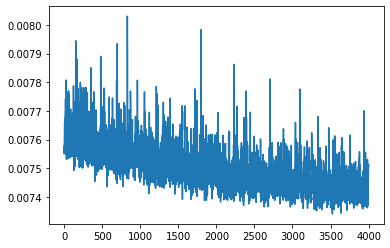

In [64]:
#history = model.fit(X_train, train_y, epochs=1000, validation_data = (X_val, val_y), callbacks=[es])
history = model.fit(X_train, train_y, epochs=4000)
model.save('./models/attempt10.h5')
plt.plot(history.history['loss'], label='train')

In [50]:
stop = time.time()

In [51]:
'''o_history = original_model.fit(X_train, train_y, epochs=1000)
original_model.save('./models/attempt2.h5')
plt.plot(o_history.history['loss'], label='train')'''

"o_history = original_model.fit(X_train, train_y, epochs=1000)\noriginal_model.save('./models/attempt2.h5')\nplt.plot(o_history.history['loss'], label='train')"

In [52]:
#plt.plot(o_history.history['loss'], label='train')

In [65]:
#nnmodel.test_model(x_test, test_y[1:])
pred_ret = model.predict(X_test)
#pred_ret = nnmodel.predict_ret(x_test, y=None)

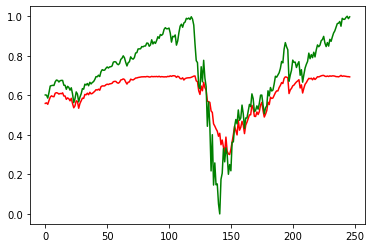

In [69]:
plt.plot(pred_ret, color='r')
plt.plot(np.array(test_y), color='g')
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()
pred = scaler.fit_transform(np.array(pred_ret).reshape(-1,1))
actual = scaler.transform(np.array(test_y).reshape(-1,1))

In [57]:
from sklearn.utils import check_array

In [58]:
pred_ret.shape

(247, 1)

In [59]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    #y_true, y_pred = check_array(y_true, y_pred)
    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    diff = np.divide(np.abs(np.subtract(y_true, y_pred)), y_pred)
    print(diff)
    print(diff.shape)
    return np.mean(diff) * 100

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(np.array(test_y), pred_ret)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

[[0.07630343]
 [0.06932521]
 [0.05685126]
 [0.07084664]
 [0.09518436]
 [0.08675151]
 [0.09524881]
 [0.09602919]
 [0.0944403 ]
 [0.10414523]
 [0.10486354]
 [0.10066471]
 [0.10607953]
 [0.11098448]
 [0.1026753 ]
 [0.09154633]
 [0.09079838]
 [0.08761703]
 [0.09965134]
 [0.09823623]
 [0.09476023]
 [0.09100278]
 [0.08802511]
 [0.04810028]
 [0.06640173]
 [0.07836958]
 [0.06671309]
 [0.06045721]
 [0.05710725]
 [0.06105666]
 [0.08258488]
 [0.0794584 ]
 [0.08590168]
 [0.08189113]
 [0.08042167]
 [0.0754304 ]
 [0.08211433]
 [0.082399  ]
 [0.09127008]
 [0.08844397]
 [0.09551972]
 [0.10524114]
 [0.10707017]
 [0.11245233]
 [0.11022148]
 [0.11766964]
 [0.12676342]
 [0.12281532]
 [0.12302155]
 [0.12781725]
 [0.13248444]
 [0.12796854]
 [0.13064856]
 [0.13058153]
 [0.13251946]
 [0.14800724]
 [0.14840699]
 [0.14725348]
 [0.14326838]
 [0.14152923]
 [0.14259451]
 [0.15332483]
 [0.1595377 ]
 [0.17091598]
 [0.1612925 ]
 [0.14849811]
 [0.13965175]
 [0.14781254]
 [0.1530251 ]
 [0.16555016]
 [0.15782453]
 [0.15

In [62]:
#pd.Series(np.array(test_y)) - pd.Series(np.array(pred_ret))

In [63]:
stop - start

196.6363377571106